# Problem 2 & Problem 4.b
## Working with images

importing everything we need

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
import os

Getting the list of paths of the images in the director

In [2]:
images_director="data/images"
images=os.listdir(images_director)

Getting images loaded in a list

In [3]:
def load_images():
    return [Image.open(os.path.join(images_director,img)) for img in images]

### Show one of the images

Getting a random image to plot .

In [4]:
def get_random_img():
    random_image = random.randrange(0, len(images))

    image_to_plot_path = os.path.join(images_director,images[random_image])
    image_to_plot = Image.open(image_to_plot_path)
    return image_to_plot

### Showing a random image from folder

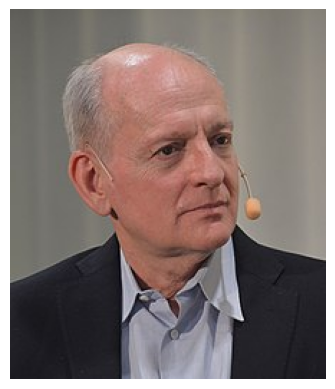

In [5]:
def show_one_image():
    image_to_plot=get_random_img()
    plt.imshow(image_to_plot)
    plt.axis('off')
    plt.show()
show_one_image()

### If images do not have the same dimension resize them to 128x128 and plot them all in a single image

Getting resized image
returns resized image coressponding to criteria

In [6]:
def resize_image(image_path,target_w=128,target_height=128):
    image=Image.open(image_path)
    resized_image=image.resize((target_w,target_height))
    return resized_image

Plotting all of the images given in a grid.
    shows all of the images in a grid.

In [7]:
def plot_grid(images,rows,cols,cmap=None):
    fig,axes=plt.subplots(rows,cols,figsize=(10,10))
    for i,ax in enumerate(axes.flat):
        ax.imshow(images[i],cmap=cmap)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Resizing all of the images in a folder

In [8]:
def resize_images_folder():
    resized=[]
    for img in images:
        image_path=os.path.join(images_director,img)
        resized_image=resize_image(image_path,128,128)
        resized.append(resized_image)
    return resized

We verify if all of the images in the folder have the same size
    returns true- if images have the same size
    returns false- if they don t

In [9]:
def verify_equal_dimension():
    found=-1
    size=()
    for image in images:
        image_path=os.path.join(images_director,image)
        #sunt la prima poza
        image = Image.open(image_path)
        if(found==-1):
            size=image.size
            found=1
        else:
            if(size!=image.size):
                return False
    return True

#### The redimention itself
Here we verify if they need to be resize or not.
After resizing if needed, we plot the images

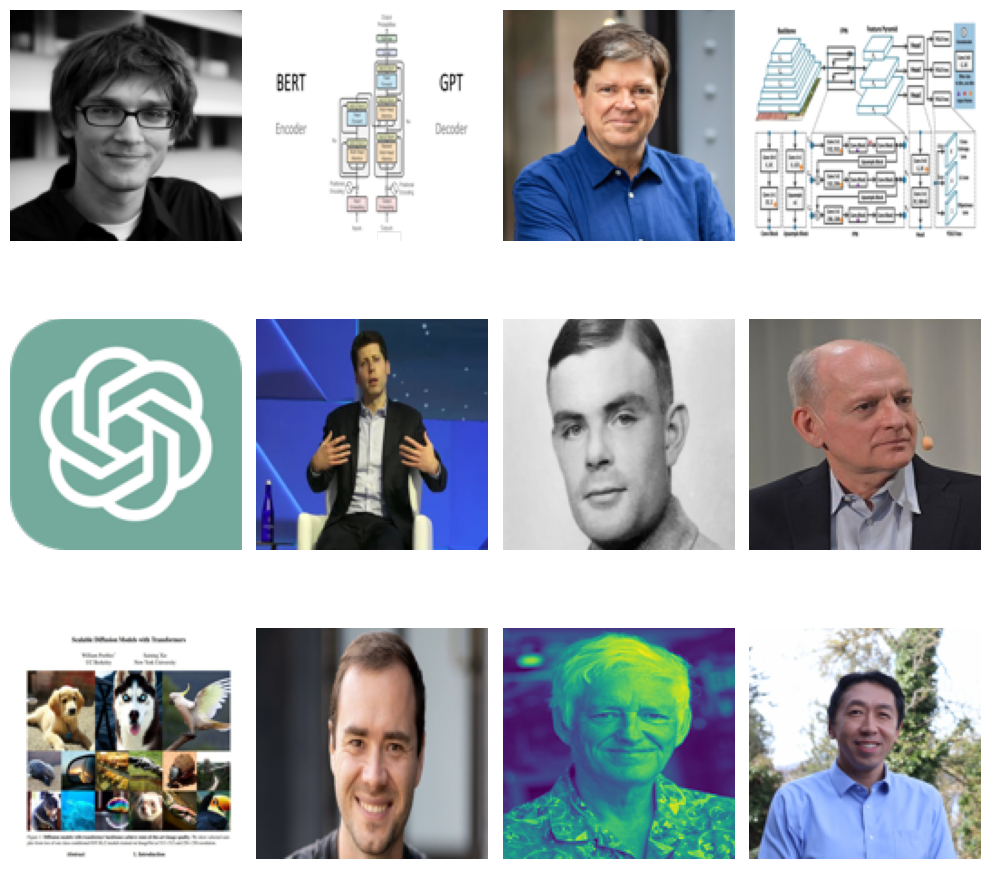

In [10]:
def redimension_if_needed():
    if(verify_equal_dimension()):
        plot_grid(load_images(),3,4)
    else:
        plot_grid(resize_images_folder(),3,4)

redimension_if_needed()

### Transform images in gray level

Gray-scale image given
    returns image gray-scaled

In [11]:
def grayscale_image(image):
    gray_image=image.convert('L')
    return  gray_image

Gray-scale all images in folder
    returns all of the images gray scaled

In [12]:
def gray_scale_all_images():
    gray_images=[]
    for image in images:
        path=os.path.join(images_director,image)
        image=Image.open(path)
        grayed=grayscale_image(image)
        gray_images.append(grayed)
    return gray_images

Showing all of the images in the folder in gray-scale tones

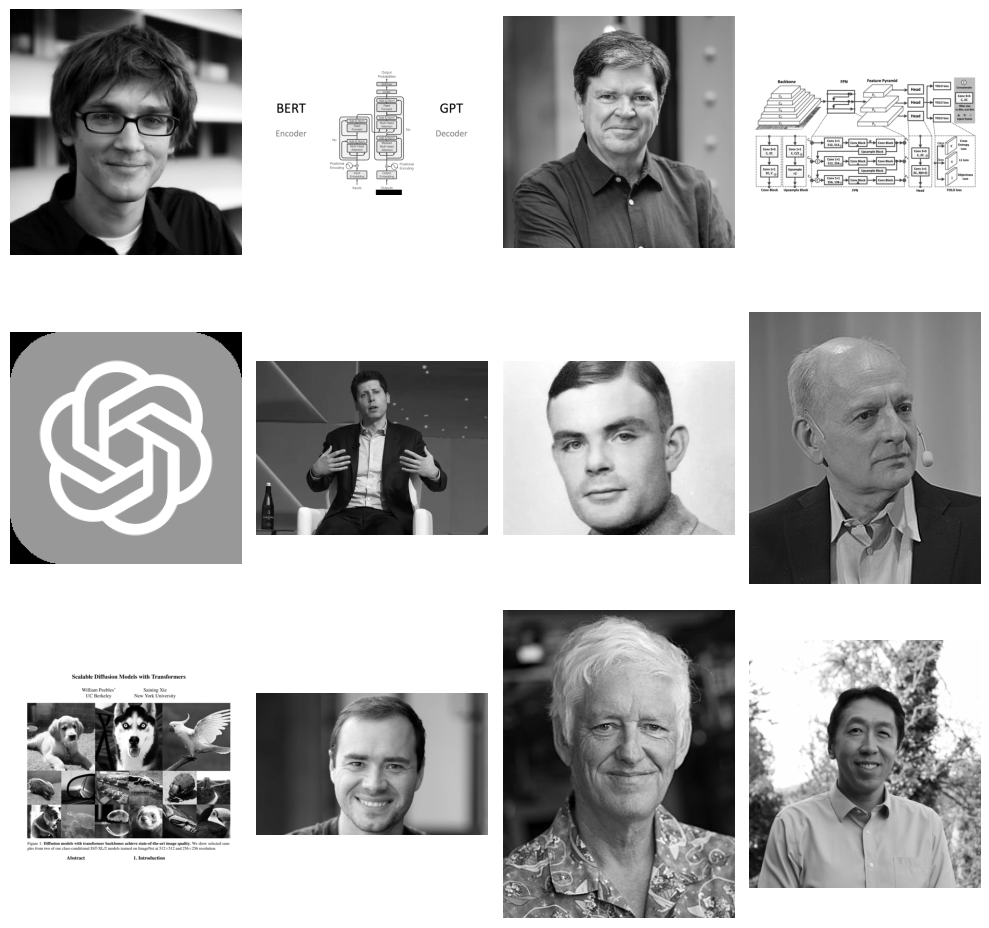

In [13]:
def show_images_in_gray_tone():
    plot_grid(gray_scale_all_images(),3,4,'gray')
show_images_in_gray_tone()

### Blur one Image and show it in before and after

Blur the image given
    returns the given image blured

In [14]:
def blur_image(image:Image):
    image_blurred=image.filter(ImageFilter.BLUR)
    return image_blurred

Plot an image with before and after!
    It plots two images in a before and after view!

In [15]:
def plot_b_a(og_img:Image,changed_img:Image):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
    ax1.imshow(og_img)
    ax1.set_title('Before')
    ax2.imshow(changed_img)
    ax2.set_title('After')
    plt.tight_layout()
    plt.show()

#### Actual function that will perform what we need
    It gets a random image from the folder. 
    It blurs it and then it shows it in a before and after view.

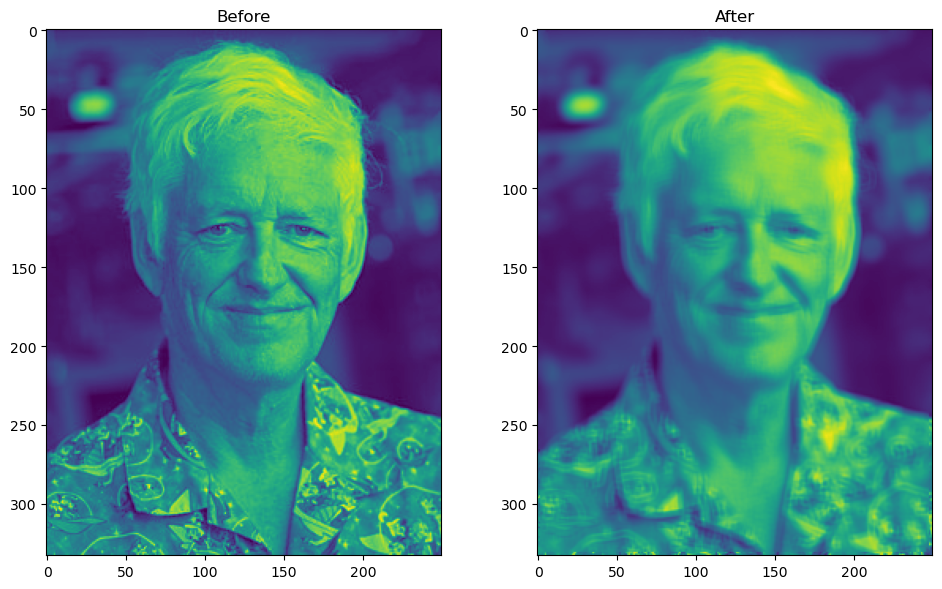

In [16]:
def blur_an_image():
    random_image=get_random_img()
    blured_image=blur_image(random_image)
    plot_b_a(random_image,blured_image)
blur_an_image()

### Identify edges of an image and showing it in a before and after look
    In detecting the edges to get a better view of them I sharpened the image first and then found the edges.

In [17]:
def detect_edges(image):

    edges=image.filter(ImageFilter.SHARPEN).filter(ImageFilter.FIND_EDGES)
    return edges

#### This will get a random image and then show it without edges and with edges

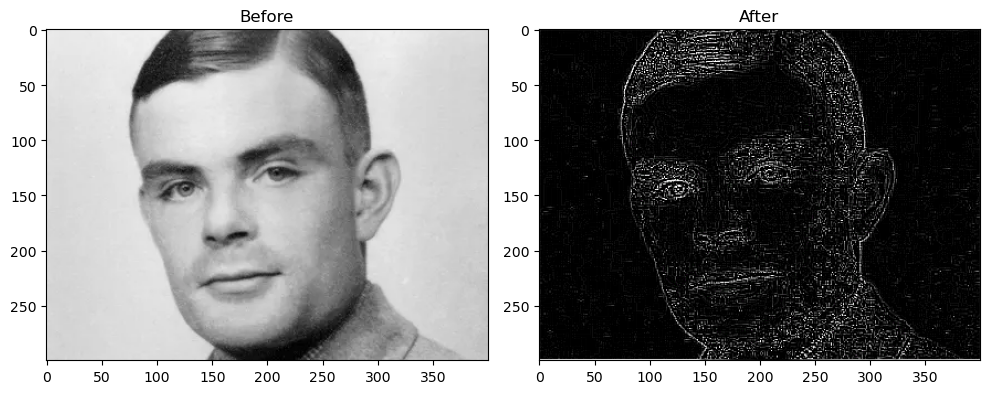

In [18]:
def plot_images_with_edges_b_and_a():
    random_image=get_random_img()
    edged_image=detect_edges(random_image)
    plot_b_a(random_image,edged_image)
plot_images_with_edges_b_and_a()

### Normalization of information.
####                Normalize the data through the value of pixel from the images

Normalizing through min-max.

In [19]:
def min_max_normalize_image(image, min_value, max_value):
    normalized=(image-min_value)/(max_value-min_value)
    return normalized

Normalizing through log.

In [20]:
def log_normalize_image(image):
    return np.log(image)

Normalizing through the method given

In [21]:
def normalize(image,min_value,max_value,avg_value,normalization_method):
    if(normalization_method=='[0,1] scaled'):
        return min_max_normalize_image(image,min_value,max_value)
    if(normalization_method=='log'):
        return log_normalize_image(image)
    raise ValueError('Method not implemented/ does not exist')

The actual normalization of an Image.
    Before normalizing the image we should pre process it.
    We should first resize the image.
    GrayScale it.
    And then convenrting it to array.
    We flatten it for easier access of min,max and mean.

In [22]:
def pre_processing_of_image(image,normalization_method):
    image_path=os.path.join(images_director,image)
    #to simplify the normalization i will first resize the images, else issues could happen
    image_changed=resize_image(image_path)
    #to reduce the dimension of data i will gray scale
    image_changed=grayscale_image(image_changed)
    #now i can transform it into an array
    image_array=np.array(image_changed)
    image_flattened=image_array.flatten()
    #lets normalize it
    min_value=np.min(image_flattened)
    max_value=np.max(image_flattened)
    avg_value=np.mean(image_flattened)
    return normalize(image_flattened,min_value,max_value,avg_value,normalization_method)


#### Showing the normalization

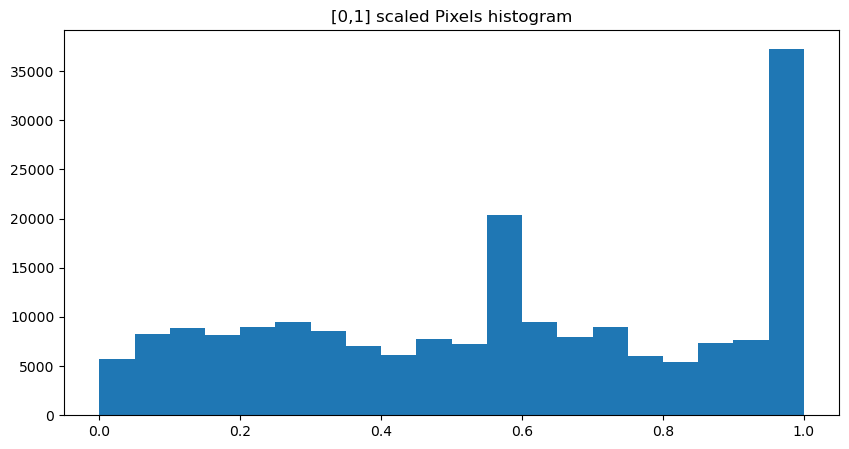

In [23]:
def normalize_images(normalization_method):
    normalized_images=[]
    for image in images:
        normalized_images.append(pre_processing_of_image(image,normalization_method))
    #transformam intr un array normalizate bidi
    normalized_array=np.array(normalized_images)
    #matrice pixeli
    matrix_pixels=normalized_array.reshape(-1)
    plt.figure(figsize=(10,5))
    plt.hist(matrix_pixels,bins=20)
    plt.title(normalization_method+' Pixels histogram')
    plt.show()

normalize_images('[0,1] scaled')